In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from cliff_walking import CliffWalkingEnv

[2017-02-12 10:34:36,503] You have 'numpy' version 1.10.1 installed, but 'gym' requires at least 1.10.4. HINT: upgrade via 'pip install -U numpy'.


In [33]:
from IPython.display import Image

In [2]:
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

In [3]:
def Q_to_eps_greedy_policy(Q, eps=0.1):
    num_actions = Q.shape[1]
    pi = np.zeros(Q.shape[0],)
    for i in range(0, Q.shape[0]):
        if np.random.uniform(0,1) < eps:
            # choose a random action
            pi[i] = np.random.randint(0, num_actions)
        else:
            # take the argmax of Q[s,.]
            pi[i] = np.argmax(Q[i])
    return pi

------

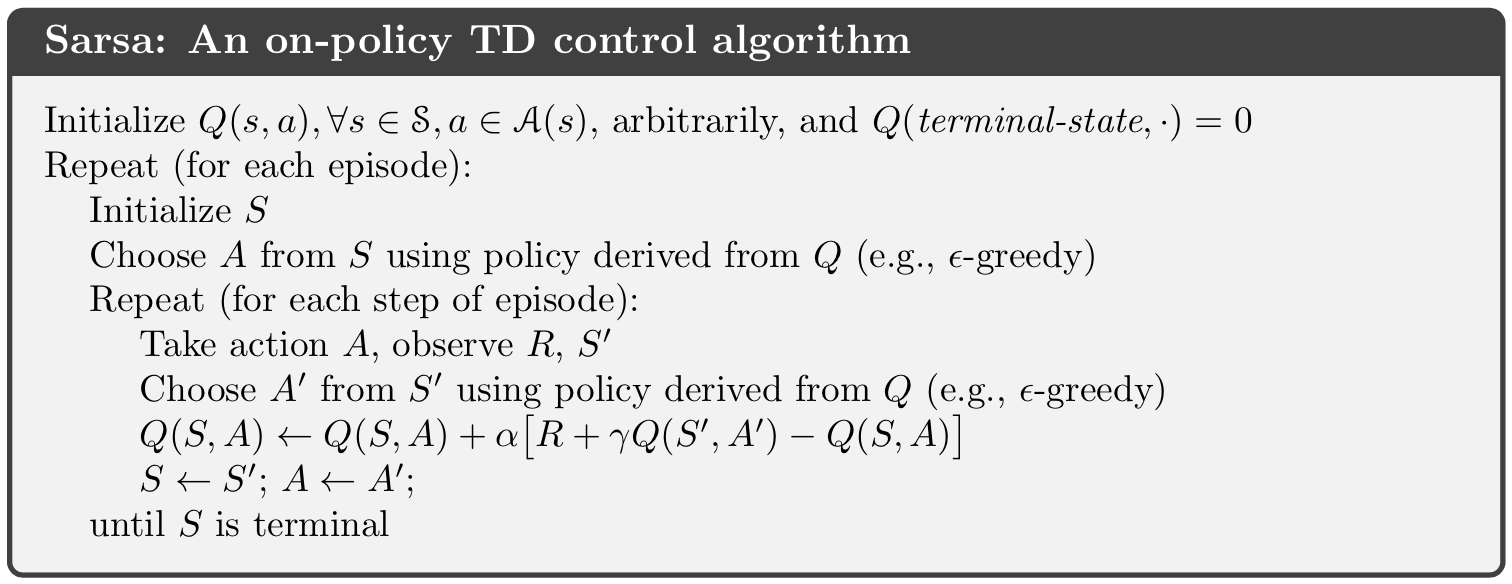

In [66]:
Image("./sarsa.png", width=800)

In [71]:
def sarsa(env, num_iters, eps, alpha, win_state, gamma=1.0):
    """
    :env:
    :num_iters: number of episodes
    :eps: epsilon
    :win_state:
    """
    Q = np.zeros((env.nS, env.nA))
    # repeat (for each episode that wins)
    reward_sums = []
    eps_lengths = []
    for num_iter in range(num_iters):
        reward_sum = 0
        eps_length = 0
        env.reset()
        # initialise S
        S = env.s
        # choose A from S using policy derived from Q (e.g. eps-greedy)
        pi = Q_to_eps_greedy_policy(Q, eps)
        A = pi[S]
        # repeat, for each step of episode
        while True:
            # take action A, observe R, S'
            _, R, is_done, _ = env.step(A)
            eps_length += 1
            reward_sum += R
            if is_done:
                # cliff example is meant to take you back to the start if you jump
                # off the cliff, so this env class hasn't been coded correctly.
                # but why isn't this hack needed in the github example???
                if env.s != win_state:
                    # go back to the start
                    env.s = 0
                    #pass
                else:
                    break
            S_prime = env.s
            # choose A' from S' using policy derived from Q (e.g. eps-greedy)
            pi = Q_to_eps_greedy_policy(Q, eps)
            A_prime = pi[S_prime]
            Q[S,A] = Q[S,A] + alpha*(R + (gamma*Q[S_prime,A_prime]) - Q[S,A])
            S = S_prime
            A = A_prime
        #print "eps length:", eps_length
        reward_sums.append(reward_sum)
        eps_lengths.append(eps_length)
    return reward_sums, eps_lengths

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


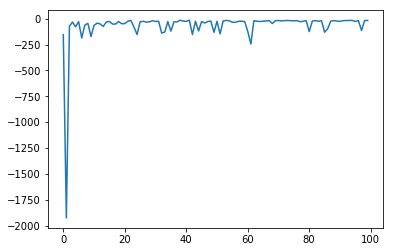

In [64]:
env = CliffWalkingEnv()
reward_sums, eps_lengths = sarsa(env, num_iters=100, eps=0.1, alpha=0.5, win_state=47)

plt.plot(reward_sums)

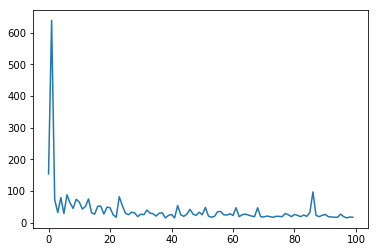

In [65]:
plt.plot(eps_lengths)

-----

In [93]:
def q_learning(env, num_iters, eps, alpha, win_state, gamma=1.0):
    """
    :env:
    :num_iters: number of episodes
    :eps: epsilon
    :win_state:
    """
    Q = np.zeros((env.nS, env.nA))
    # repeat (for each episode that wins)
    reward_sums = []
    eps_lengths = []
    for num_iter in range(num_iters):
        eps_length = 0
        reward_sum = 0
        env.reset()
        # initialise S
        S = env.s
        # repeat, for each step of episode
        while True:
            # choose A from S using policy derived from Q (e.g. eps-greedy)
            pi = Q_to_eps_greedy_policy(Q)
            A = pi[S]
            # take action A, observe R, S'
            _, R, is_done, _ = env.step(A)
            reward_sum += R
            eps_length += 1
            if is_done:
                # cliff example is meant to take you back to the start if you jump
                # off the cliff, so this env class hasn't been coded correctly.
                # but why isn't this hack needed in the github example???
                if env.s != win_state:
                    # go back to the start
                    env.s = 0
                    #pass
                else:
                    break
            S_prime = env.s
            # we want to find argmax_a Q[S_prime, a]
            Q_as = []
            for a in range(env.nA):
                Q_as.append(Q[S_prime,a])
            A_max = np.argmax(Q_as)
            Q[S,A] = Q[S,A] + alpha*(R + (gamma*Q[S_prime,A_max]) - Q[S,A])
            S = S_prime
            eps_length += 1
        #print "eps length:", eps_length
        reward_sums.append(reward_sum)
        eps_lengths.append(eps_length)
    return reward_sums, eps_lengths

/Users/cjb60/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


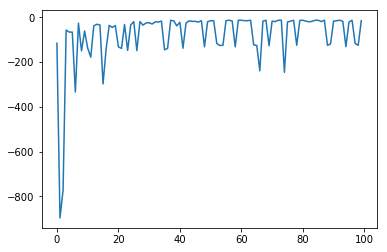

In [94]:
env = CliffWalkingEnv()
reward_sums, eps_lengths = q_learning(env, num_iters=100, eps=0.1, alpha=0.5, win_state=47)

plt.plot(reward_sums)

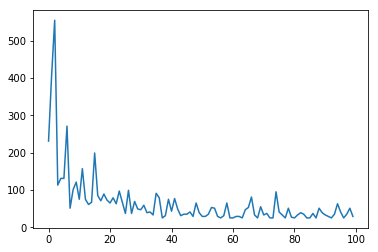

In [95]:
plt.plot(eps_lengths)

---


In [87]:
env = CliffWalkingEnv()

print(env.reset())
env.render()

print(env.step(UP))
env.render()

36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

(24, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [23]:
np.where( env._cliff.flatten() == True )[0]

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [17]:
env.nS

48